# Computer Exercise \#04: Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import SGDClassifier

### Linear classifier on Moons Data Set ###

## Exercises: ##

In [2]:
from sklearn.datasets import make_moons  
X, y = make_moons(n_samples=200, noise=0.15)
X_train, X_test, y_train, y_test=train_test_split(X,y)

__(a)__ Design a soft-margin linear support vector classifier using the default value of C = 1,

    svmclf = SVC(kernel='linear') # Default value of C=1
    svmclf.fit(X_train, y_train)
    
Remember that the larger the value of C, the narrower the margin and the fewer margin
violations there will be.

In [3]:
svmclf = SVC(kernel='linear')    # Default value of C=1
svmclf.fit(X_train, y_train)

SVC(kernel='linear')

__(b)__ What is the accuracy of your classifier on the training set and the test set? Note that
the score method may be used to find the mean accuracy on a data set (X,y) using the
command svmclf.score(X,y).


In [4]:
svmclf.score(X,y)

0.86

### Make plot of classifier, margin, and support vectors ###

__(c)__ Make a plot of the decision boundary, the margin, and the support vectors (The code to
create these plots is given in the Appendix and is included in your Jupyter notebook).
For a linear classifier, you might get a plot like the one shown in the figure below, where
the decision boundary is indicated by the solid line, the margins by the dashed lines, and
the support vectors marked with a circle.

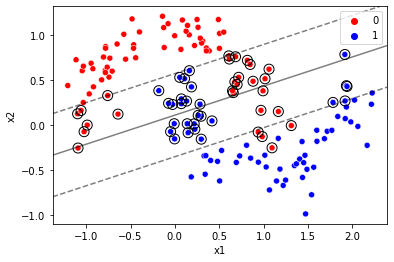

In [5]:
data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

__(d)__ Does changing the value of C have much effect on the performance of your classifier?
Explain.

Accuracy: 0.86


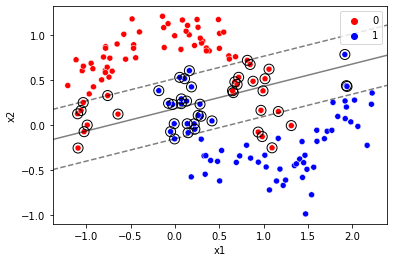

In [6]:
svmclf = SVC(kernel='linear', C=100)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

> Increasing C does not seem to affect the accuracy of the classifier, however it does seem to tighten the margins slightly.

## Question ##
Question: What learning algorithm is used in this scikit-learn method SVC? What other
learning algorithms can be used, and how are they different from this one?

> The linear algorithm is used. we can also use Gaussian, Bayes, and multinomial classifiers.

### Nonlinear SVMs on Moons Data Set ###

Repeat the previous exercise using nonlinear soft-margin classifiers.  Here all you need to do, for the most part, is replace `kernel='poly'` for a polynomial kernel and `kernel='rbf'` for a Gaussian kernel.  Of course there may be some hyperparameters of these kernels that you will want to set.

## Exercises: ##
__(a)__ Repeat the previous exercise for a linear SVM, and use a polynomial kernel by setting
kernel='poly' in the SVC class. The default value is a polynomial of degree three, which
is a good starting point. The other important parameter is C, which has a default value
of one.

Accuracy: 0.9


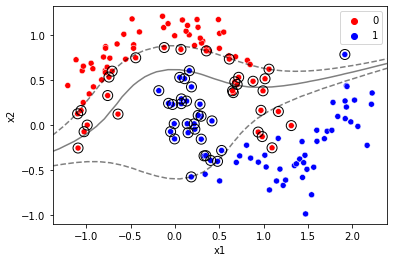

In [7]:
svmclf = SVC(kernel='poly')    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

__(b)__ Evaluate the performance of your classifier, and look at what the decision surface looks
like. Repeat for a few other polynomial orders and discuss your findings.

___Polynomial: degree 4___

Accuracy: 0.695


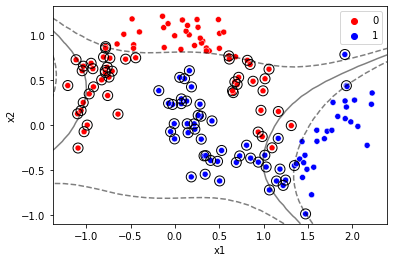

In [8]:
svmclf = SVC(kernel='poly', degree = 4)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

___Polynomial: degree 5___

Accuracy: 0.895


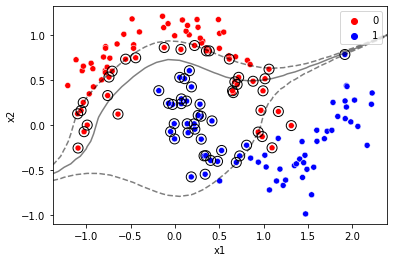

In [9]:
svmclf = SVC(kernel='poly', degree = 5)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

___Polynomial: degree 6___

Accuracy: 0.725


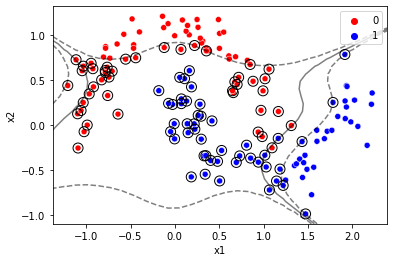

In [10]:
svmclf = SVC(kernel='poly', degree = 6)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

> __Findings Discussion:__ As the degree increases the accuracy continue to decrease. However, it should be noted that odd degrees are more accurate than previous even degrees when it comes to increasing the degree.

## Gausian Kernel ##
## Exercise: ##
__(a)__ Repeat the previous exercise using a Gaussian kernel by setting 

    kernel='rbf' in SVC.
    
Begin with the default values for C and γ. Determine the accuracy of your classifier on
the training and test sets.

Accuracy: 0.97


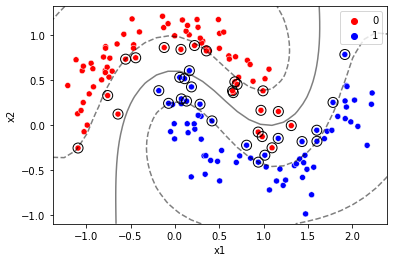

In [11]:
svmclf = SVC(kernel='rbf')    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

__(b)__ Use 
    
    gamma='scale'
and see what difference this has on the classifier and its accuracy.

>__IMPORTANT NOTE:__ As of version 0.22 The default for gamma is _already_ 'scale' so for this part of the experiment I will use 'auto' instead.

Accuracy: 0.945


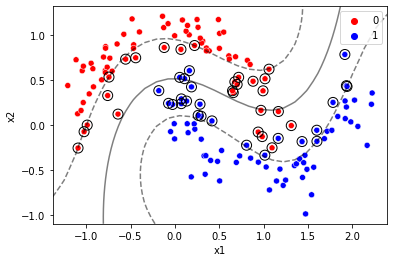

In [13]:
svmclf = SVC(kernel='rbf', gamma='auto')    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

__(c)__ Experiment with some values of γ that you set manually.

___gamma = 0.5___

Accuracy: 0.945


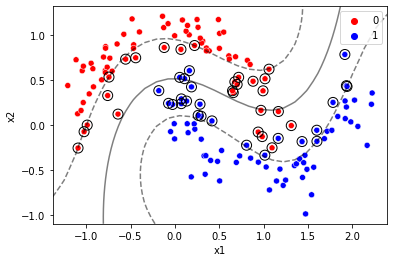

In [14]:
svmclf = SVC(kernel='rbf', gamma=0.5)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

___gamma = 0.01___

Accuracy: 0.785


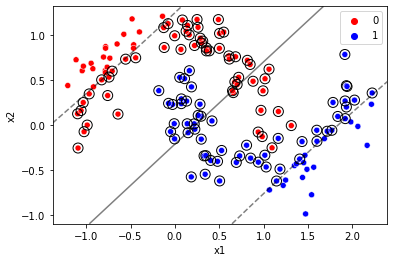

In [16]:
svmclf = SVC(kernel='rbf', gamma=0.01)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

___gamma = 0.8___

Accuracy: 0.97


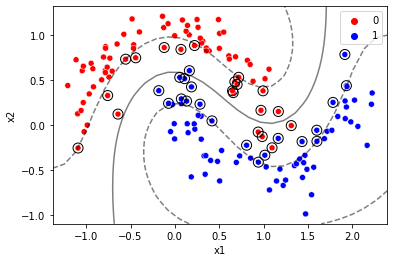

In [17]:
svmclf = SVC(kernel='rbf', gamma=0.8)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

___gamma = 0.95___

Accuracy: 0.97


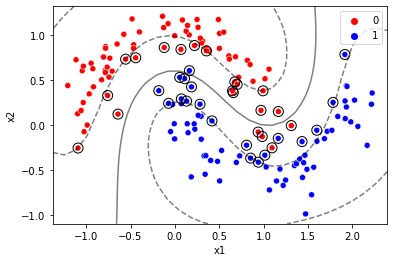

In [21]:
svmclf = SVC(kernel='rbf', gamma=0.95)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

> Accuracy increases as gamma increases

## Exercises: ##
__(a)__ Use the NuSVC class to design a nonlinear support vector classifier using a Gaussian
kernel with the default values for γ and µ. Determine the accuracy of your classifier on
the training and test sets.


Accuracy: 0.92


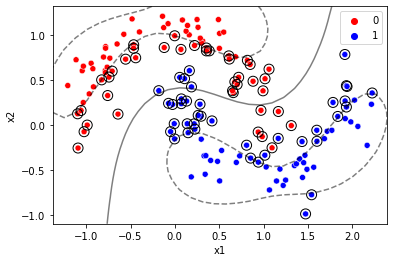

In [24]:
svmclf = NuSVC(kernel='rbf')    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

__(b)__ Experiment with some values of ν that you set manually.

>___IMPORTANT NOTE:___ _I am assuming that v is a typo in the document and is actually µ_

___µ = 0.1___

Accuracy: 0.99


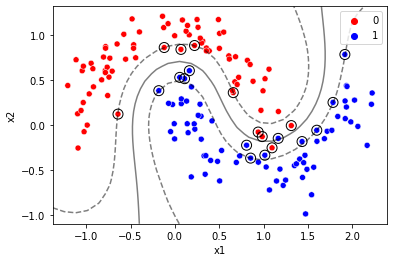

In [25]:
svmclf = NuSVC(kernel='rbf', nu = 0.1)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

___µ = 0.5___

Accuracy: 0.92


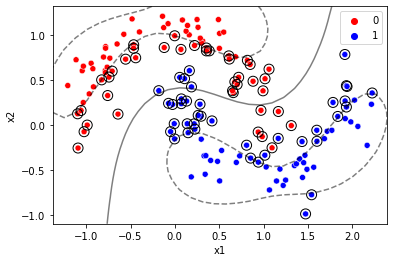

In [28]:
svmclf = NuSVC(kernel='rbf', nu = 0.5)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

___µ = 0.9___

Accuracy: 0.875


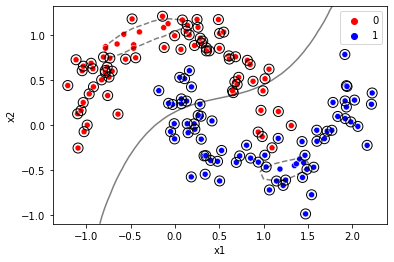

In [29]:
svmclf = NuSVC(kernel='rbf', nu = 0.9)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

data = pd.DataFrame(X_train,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

> As nu increases, the accuracy of the classifier also increases

# Computer Exercise 4.2 #

## Cancer Data Set ##

Load the data set, and print featues and shape.

In [57]:
from sklearn.datasets import load_breast_cancer
#Load Cancer Data Set
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [58]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [59]:
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample Counts per Class:\n{}".format({n:v for n, v in 
                                             zip(cancer.target_names, np.bincount(cancer.target))}))

Shape of cancer data: (569, 30)
Sample Counts per Class:
{'malignant': 212, 'benign': 357}


Generate training and test set, scale data, and then use SVM classes to design a cancer classifier.

_Create these two sets using train_test_split with the default value of 25% of the
samples for the size of the test set._

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

_Scale the training and test sets using the StandardScaler class, which scales each feature
so that it has zero mean and unit variance._


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

## 1. Linear Soft-Margin Support Vector Classifier ##

## Exercises ##

__i.__ Design a soft-margin linear soft-margin support vector classifier with C = 1.

In [73]:
svmclf = SVC(kernel='linear')    # Default value of C=1
svmclf.fit(X_train, y_train)


SVC(kernel='linear')

__ii.__ Fnd the accuracy of your classifier on the training set and the test set.


In [74]:
print("Accuracy:", svmclf.score(X,y))

print("Training Accuracy:", svmclf.score(X_train,y_train))

print("Test Accuracy:", svmclf.score(X_test,y_test))

Accuracy: 0.37258347978910367
Training Accuracy: 0.9835680751173709
Test Accuracy: 0.993006993006993


__iii.__ Make a plot of the decision boundary, the margin, and the support vectors.

___EMAIL FROM PROFESSOR___: _In computer exercise 4.2 part 1 where you are aksed to make a plot of the decision function when the feature vector is of dimension 30, clearly this is not possible so skip this part.  Later, when you reduce the dimension to d=2 you will be able to make such a plot._

__iv.__ How many support vectors are there for each class?

> See outputs below for the nuber of support vectors for [class 0, class 1] 

In [75]:
print(svmclf.n_support_)

[20 20]


__v.__ Does changing the value of C have much effect on the performance of your classifier?
Explain.

In [76]:
svmclf = SVC(kernel='linear', C = 3500)    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

print("Training Accuracy:", svmclf.score(X_train,y_train))

print("Test Accuracy:", svmclf.score(X_test,y_test))

Accuracy: 0.37258347978910367
Training Accuracy: 0.9976525821596244
Test Accuracy: 0.986013986013986


> Increasing the value of C increases both the training and testing accuracy, such that the values are more closely approaching 1.0

__vi. Research Question (Optional)__
If you print out svmclf.dual_coef_ you might get something that looks like the
following array of values:
    
    array([[-1. , -1. , -1. , -0.85053935, -1. ,
            -1. , -1. , -1. , -1. , -1. ,
            -1. , -1. , -1. , -1. , -1. ,
            -1. , -0.14946065, -1. , -1. , -1. ,
            -1. , -1. , -1. , -1. , -1. ,
            1. , 1. , 1. , 1. , 1. ,
            1. , 1. , 1. , 1. , 1. ,
            1. , 1. , 1. , 1. , 1. ,
            1. , 1. , 1. , 1. , 1. ,
            1. , 1. , 1. , 1. ]])
    
How do you interpret these numbers? For example, what does it mean if a value is
+1 or −1, or if it is in the interval (0, 1)? Why are these values limited to the range
[−1, 1]?


In [77]:
svmclf = SVC(kernel='linear')    # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))

print("Training Accuracy:", svmclf.score(X_train,y_train))

print("Test Accuracy:", svmclf.score(X_test,y_test))

svmclf.dual_coef_

Accuracy: 0.37258347978910367
Training Accuracy: 0.9835680751173709
Test Accuracy: 0.993006993006993


array([[-0.89921443, -1.        , -1.        , -0.44889036, -1.        ,
        -0.06277715, -0.68561739, -0.65674872, -0.07994078, -1.        ,
        -0.15070994, -1.        , -1.        , -1.        , -1.        ,
        -0.46405194, -0.5535286 , -1.        , -1.        , -0.68331001,
         0.41905851,  1.        ,  1.        ,  0.99666311,  0.8650927 ,
         1.        ,  1.        ,  0.02031577,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  0.16868214,  0.30033698,
         0.54344396,  0.0804861 ,  1.        ,  0.29071005,  1.        ]])

> These values limited to the range [−1, 1] due to thhe coefficient $C$. The values are actually limited by staying within the range of $[-C, C]$ 

## 2. Nonlinear Soft-Margin Support Vector Classifier ##

In [81]:
from sklearn.datasets import load_breast_cancer
#Load Cancer Data Set
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [82]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [83]:
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample Counts per Class:\n{}".format({n:v for n, v in 
                                             zip(cancer.target_names, np.bincount(cancer.target))}))

Shape of cancer data: (569, 30)
Sample Counts per Class:
{'malignant': 212, 'benign': 357}


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

## Exercises ##
__(a)__ Design a soft-margin nonlinear support vector classifier using a radial basis function kernel
with the default values for γ and C in the SVC class.


In [86]:
svmclf = SVC(kernel='rbf')    # Default value of C=1
svmclf.fit(X_train, y_train)

SVC()

__(b)__ Determine the performance of your classifier on the training and test sets. Do your results
indicate that you may be under-fitting or over-fitting the data? Discuss.


In [87]:
#print("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_train,y_train))
print("Test Accuracy:", svmclf.score(X_test,y_test))


Accuracy: 0.37258347978910367
Training Accuracy: 0.9882629107981221
Test Accuracy: 0.9790209790209791


> I believe my accuracies indicate that I am overfitting the data because the accuracy for the classifier For the regular X,y is low, however both my Testing and Training accuracies are both high (far above 95%). 

__(c)__ Experiment with different values of gamma. Begin by setting gamma = 'auto'. What value
of γ is used with this setting? How well does your classifier work? Next, set the value of
gamma manually and see if you can find a better value to use.

In [89]:
svmclf = SVC(kernel='rbf', gamma= 'auto')    # Default value of C=1
svmclf.fit(X_train, y_train)

#print("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_train,y_train))
print("Test Accuracy:", svmclf.score(X_test,y_test))


Accuracy: 0.37258347978910367
Training Accuracy: 0.9882629107981221
Test Accuracy: 0.9790209790209791


> value of γ is used with this setting is $\frac 1 {\# of features} $

In [90]:
svmclf = SVC(kernel='rbf', gamma= 0.04)    # Default value of C=1
svmclf.fit(X_train, y_train)

#print("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_train,y_train))
print("Test Accuracy:", svmclf.score(X_test,y_test))

Accuracy: 0.37258347978910367
Training Accuracy: 0.9882629107981221
Test Accuracy: 0.9790209790209791


In [91]:
svmclf = SVC(kernel='rbf', gamma= 0.9)    # Default value of C=1
svmclf.fit(X_train, y_train)

#print("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_train,y_train))
print("Test Accuracy:", svmclf.score(X_test,y_test))

Accuracy: 0.6274165202108963
Training Accuracy: 1.0
Test Accuracy: 0.6153846153846154


In [94]:
svmclf = SVC(kernel='rbf', gamma= 0.5)   # Default value of C=1
svmclf.fit(X_train, y_train)

#rint("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_train,y_train))
print("Test Accuracy:", svmclf.score(X_test,y_test))

Accuracy: 0.6274165202108963
Training Accuracy: 1.0
Test Accuracy: 0.7552447552447552


In [96]:
svmclf = SVC(kernel='rbf', gamma= 0.001)   # Default value of C=1
svmclf.fit(X_train, y_train)

#print("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_train,y_train))
print("Test Accuracy:", svmclf.score(X_test,y_test))

Accuracy: 0.6274165202108963
Training Accuracy: 0.9460093896713615
Test Accuracy: 0.951048951048951


In [105]:
svmclf = SVC(kernel='rbf', gamma= 0.0001)   # Default value of C=1
svmclf.fit(X_train, y_train)

print("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_train,y_train))
print("Test Accuracy:", svmclf.score(X_test,y_test))

Accuracy: 0.6274165202108963
Training Accuracy: 0.7699530516431925
Test Accuracy: 0.7552447552447552


>Best gamma was the 'auto'

## 3. Dimensionality Reduction ##

### Two Features ###
Here is how you may extract two features, here 10 and 11, to generate a two-dimensional data set for classification.

In [106]:
X_2f=np.column_stack((X_train[:,[9]],X_train[:,[10]]))

Design a classifier based on only two features and compare its performance to using all thirty features

## Exercises: ##
__(a)__ The two features that are the most important when designing a classifier using a decision
tree are features 23 and 27, ’worst area’ and ’worst concave points’ (Don’t forget that the
feature numbers begin at index 0). Design a linear soft-margin classifier using only these
two features and report their accuracies on the training and test sets.

In [123]:
X_2f=np.column_stack((X_train[:,[23]],X_train[:,[27]]))
#y_2f=np.column_stack((y_train[:,[23]],y_train[:,[27]]))

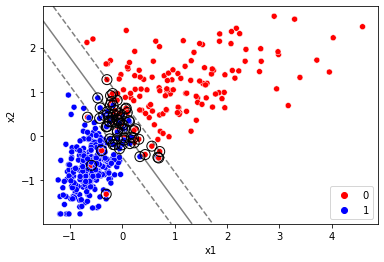

In [124]:
svmclf = SVC(kernel='linear')    # Default value of C=1
svmclf.fit(X_2f, y_train)


data = pd.DataFrame(X_2f,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()



In [125]:
#print("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_2f,y_train))
print("Test Accuracy:", svmclf.score(np.column_stack((X_test[:,[23]],X_test[:,[27]])),y_test))

Training Accuracy: 0.9553990610328639
Test Accuracy: 0.951048951048951


In [126]:
print(svmclf.n_support_)

[33 33]


__(b)__ Repeat using a nonlinear classifier with a radial basis function kernel.

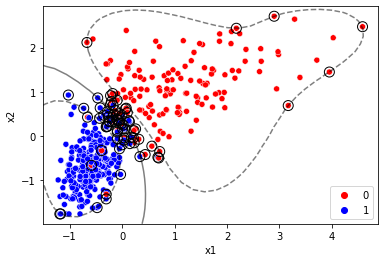

In [120]:
svmclf = SVC(kernel='rbf')    # Default value of C=1
svmclf.fit(X_2f, y_train)

data = pd.DataFrame(X_2f,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [121]:
#print("Accuracy:", svmclf.score(X,y))
print("Training Accuracy:", svmclf.score(X_2f,y_train))
print("Test Accuracy:", svmclf.score(np.column_stack((X_test[:,[23]],X_test[:,[27]])),y_test))

Training Accuracy: 0.9553990610328639
Test Accuracy: 0.965034965034965


In [122]:
print(svmclf.n_support_)

[38 36]


__(c)__ How do your classifiers compare to those designed using all thirty features?

> The two feature classifiers approximate the data fairly closely. However, in comparrison to those designed using all thirty features there are a lot more support vectors for each class in play. Perhaps applying NuSVC in order to limit the number of errors would be more beneficial. Also, the classifiers used on 

### PCA ###

Use PCA to find the two principal components, and design classifiers based on these features.

In [127]:
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

## Exercises: ##
__(a)__ Project the cancer data set onto its first two principle components, and design a twodimensional linear soft margin SVM using these two principle components.


In [137]:
pca=PCA(n_components=2)
#X_2d=pca.fit_transform(X)
X_2d_train_pca = pca.fit_transform(X_train)
X_2d_test_pca = pca.fit_transform(X_test)
print(X_2d_train_pca.shape)
print(X_2d_test_pca.shape)

(426, 2)
(143, 2)


In [138]:
print("PCA components:\n{}".format(pca.components_))


PCA components:
[[ 0.23099331  0.11228827  0.23745706  0.23241075  0.13064734  0.22760769
   0.2571498   0.2590035   0.11062127  0.01102714  0.21484407 -0.0057573
   0.22034719  0.20698055 -0.01879926  0.15841919  0.17163435  0.20074198
  -0.04739047  0.07529851  0.23674653  0.11265413  0.24394784  0.23296121
   0.10772924  0.2068251   0.22785267  0.24953312  0.07701151  0.10708397]
 [-0.18890575 -0.08591361 -0.17234064 -0.1870339   0.20477952  0.18449283
   0.06635055 -0.00502343  0.1859932   0.37905446 -0.11340925  0.0177351
  -0.09313533 -0.13789614  0.21161161  0.24615939  0.20210117  0.11697608
   0.19810552  0.29303264 -0.18242021 -0.08575544 -0.16418185 -0.18163653
   0.18181295  0.17559362  0.10615434  0.01487068  0.17312823  0.31900161]]


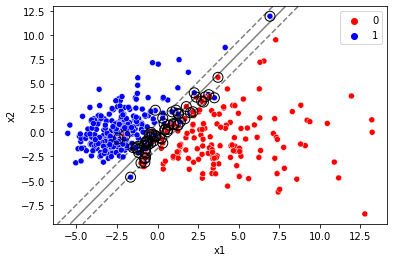

In [141]:
svmclf = SVC(kernel='linear')    # Default value of C=1
svmclf.fit(X_2d_train_pca, y_train)

data = pd.DataFrame(X_2d_train_pca,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

__(b)__ What its the training and test errors? How well does your classifier perform compared to
previous classifiers?


In [142]:
print("Training Accuracy:", svmclf.score(X_2d_train_pca,y_train))
print("Test Accuracy:", svmclf.score(X_2d_test_pca,y_test))

Training Accuracy: 0.9577464788732394
Test Accuracy: 0.951048951048951


> The classifier performs slightly worse than the previous classifiers but still manages to deliver accuracies above 95%. It is comparable to tthe previous ones.

__(c)__ Repeat using a nonlinear classifier with a radial basis function kernel.

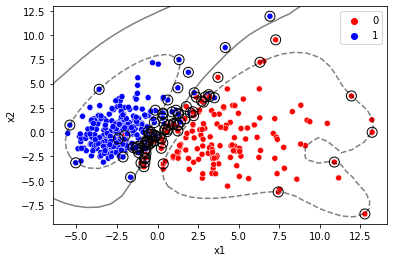

In [143]:
svmclf = SVC(kernel='rbf')    # Default value of C=1
svmclf.fit(X_2d_train_pca, y_train)

data = pd.DataFrame(X_2d_train_pca,columns=["x1","x2"])
sns.scatterplot(x="x1", y="x2", data=data, hue=y_train, palette=['red','blue'])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svmclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svmclf.support_vectors_[:, 0], svmclf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [144]:
print("Training Accuracy:", svmclf.score(X_2d_train_pca,y_train))
print("Test Accuracy:", svmclf.score(X_2d_test_pca,y_test))

Training Accuracy: 0.9389671361502347
Test Accuracy: 0.9440559440559441


__(d)__ How do your classifiers compare to those designed using all thirty features?

> Compared to the those designed using all thirty features, these classifiers have slightly larger margins of error. Though the differences are extremely small, it is still present. 

## Final Analysis ##
Out of all of the classifiers that you have designed for breast cancer detection, which one do
you think is the best? Make the argument to a client on why you made this choice.
